In [7]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('video_analytics_data.csv')

# Drop the row where episode_id = 'P1ALkQMfkjc'
df = df[df['episode_id'] != 'P1ALkQMfkjc']

# Display the first few rows of the dataframe
print(df.head())

# Basic analysis
print("Summary statistics:")
print(df.describe())

print("Column names:")
print(df.columns)

            guest_name   episode_id  \
1    Dr Gabrielle Lyon  2j3T4oYJPfI   
2     Konstantin Kisin  GbV6iW26h-Q   
3      Jessie Inchausp  3esF-pNAM9c   
4         The Gottmans  H9kPmiV0B34   
5  Dr Michael Israetel  OTrTqs9FLq0   

                                        episode_name release_date  \
1  The Anti-Obesity Doctor: If You Don't Exercise...   2024-09-26   
2  The Anti-Woke Expert: “We Are Witnessing The F...   2024-09-23   
3  Glucose Goddess: The Alarming New Truth About ...   2024-09-19   
4  The Gottman Doctors: Affairs Can Save Your Rel...   2024-09-16   
5  The Muscle Building Expert: They’re Lying To Y...   2024-09-12   

   transcript_length         transcribed_time  \
1              99106  2024-10-01 17:01:59 UTC   
2             123337  2024-10-01 17:04:37 UTC   
3             107251  2024-10-01 17:08:18 UTC   
4             110972  2024-10-01 17:11:29 UTC   
5             122939  2024-10-01 17:14:12 UTC   

                        cta_video_id  \
1  DOAC_CTA_Liv

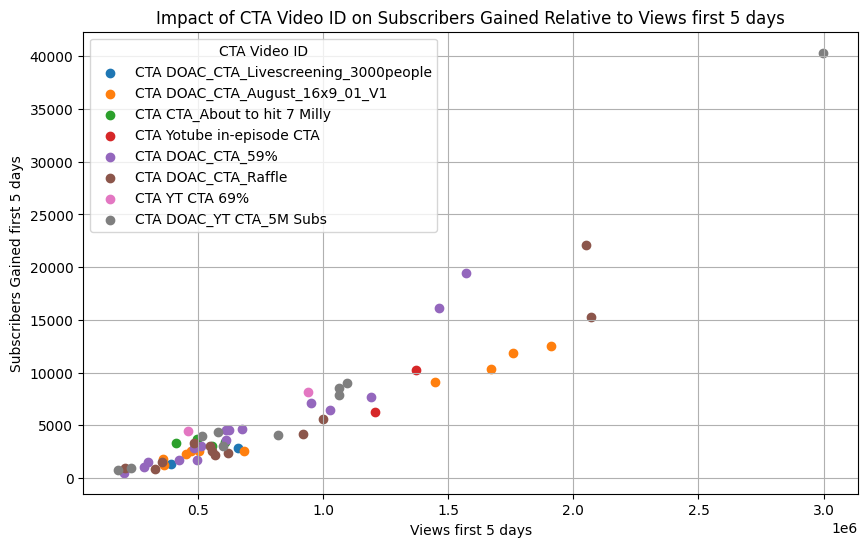

In [4]:
import matplotlib.pyplot as plt

# Read the CSV file

# Create a scatter plot to show the impact of cta_video_id on subscriber_count relative to views
plt.figure(figsize=(10, 6))
for cta_id in df['cta_video_id'].unique():
    subset = df[df['cta_video_id'] == cta_id]
    plt.scatter(subset['views_y'], subset['subscribersGained_y'], label=f'CTA {cta_id}')

plt.title('Impact of CTA Video ID on Subscribers Gained Relative to Views first 5 days')
plt.xlabel('Views first 5 days')
plt.ylabel('Subscribers Gained first 5 days')
plt.legend(title='CTA Video ID')
plt.grid(True)
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/845803701.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_counts.index, y=cta_counts.values, palette=custom_palette)
/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/845803701.py:12: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=cta_counts.index, y=cta_counts.values, palette=custom_palette)


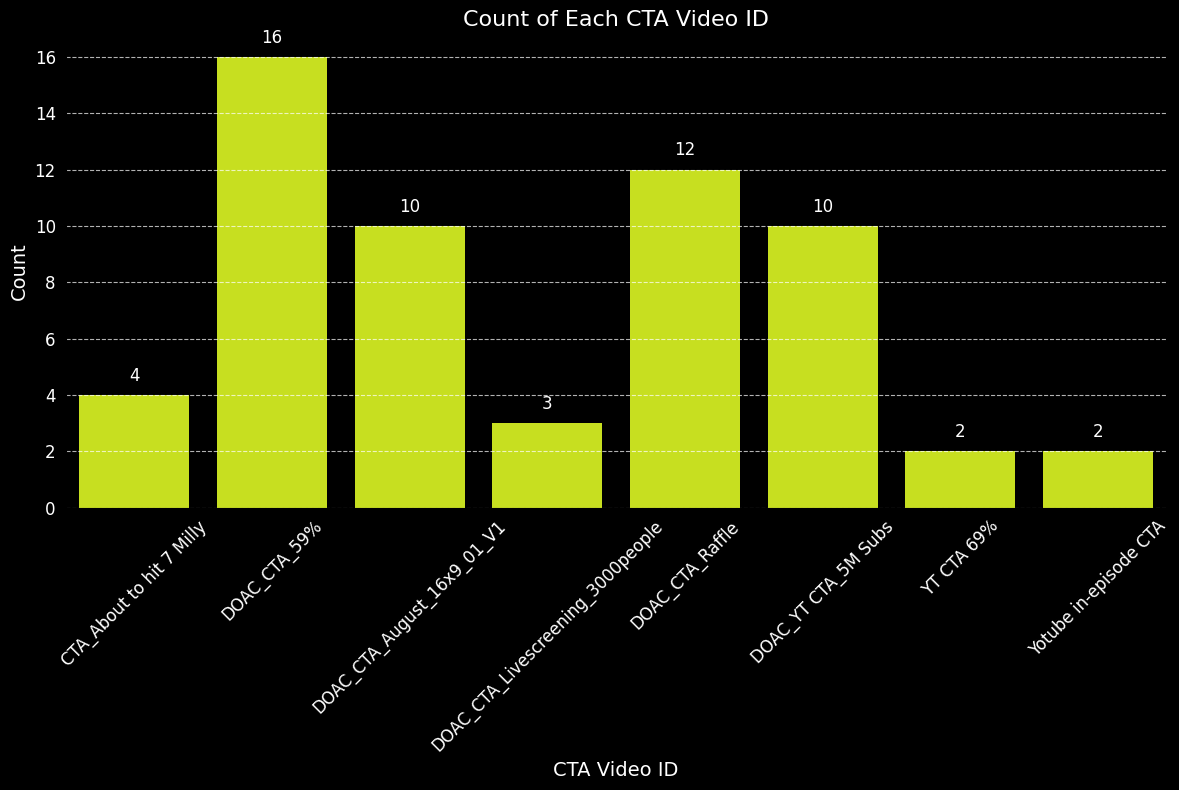

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette based on the image
custom_palette = ['#DFFF00']  # Bright yellow-green color from the image

# Bar chart for count of each cta_video_id over time
plt.figure(figsize=(12, 8))
cta_counts = df['cta_video_id'].value_counts().sort_index()

# Use seaborn for a more aesthetically pleasing plot
sns.barplot(x=cta_counts.index, y=cta_counts.values, palette=custom_palette)

plt.title('Count of Each CTA Video ID', fontsize=16, color='white')
plt.xlabel('CTA Video ID', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add count labels on top of the bars
for index, value in enumerate(cta_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/3136989026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clean_labels, y=cta_counts.values, palette=custom_palette)
/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/3136989026.py:15: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=clean_labels, y=cta_counts.values, palette=custom_palette)


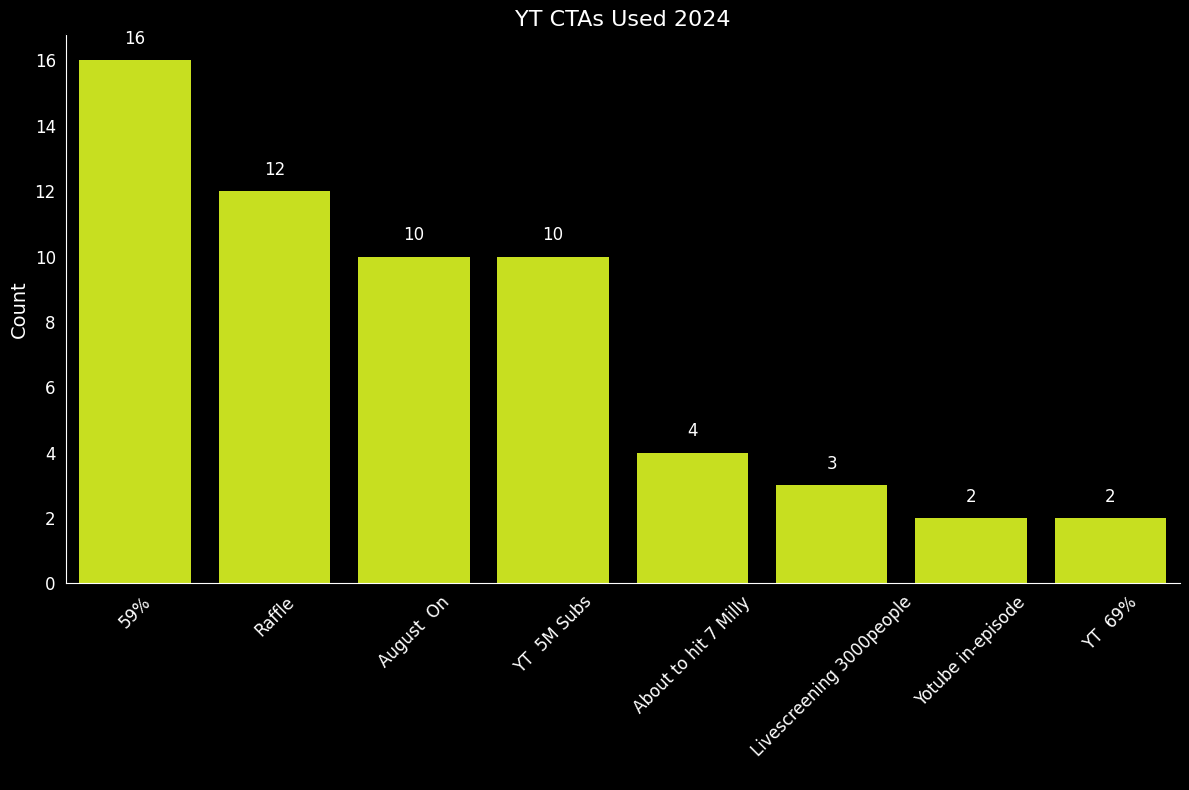

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette based on the image
custom_palette = ['#DFFF00']  # Bright yellow-green color from the image

# Bar chart for count of each cta_video_id over time
plt.figure(figsize=(12, 8))
cta_counts = df['cta_video_id'].value_counts().sort_values(ascending=False)

# Clean up the x-axis labels
clean_labels = cta_counts.index.str.replace('_', ' ').str.replace('DOAC', '').str.replace('CTA', '').str.replace('16x9 01 V1',' On').str.strip()

# Use seaborn for a more aesthetically pleasing plot
sns.barplot(x=clean_labels, y=cta_counts.values, palette=custom_palette)

plt.title('YT CTAs Used 2024', fontsize=16, color='white')
#plt.xlabel('CTA Video ID', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Remove horizontal grid lines
plt.grid(False)

# Customize axis lines to be white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Add count labels on top of the bars
for index, value in enumerate(cta_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

cta_video_id
DOAC_CTA_Livescreening_3000people    0.003815
DOAC_CTA_August_16x9_01_V1           0.005701
Yotube in-episode CTA                0.007030
CTA_About to hit 7 Milly             0.007084
DOAC_CTA_Raffle                      0.007090
DOAC_YT CTA_5M Subs                  0.007960
DOAC_CTA_59%                         0.008821
YT CTA 69%                           0.009406
Name: effectiveness_ratio, dtype: float64
Original: DOAC_CTA_Livescreening_3000people, Cleaned: Livescreening 3000people
Original: DOAC_CTA_August_16x9_01_V1, Cleaned: August  On
Original: Yotube in-episode CTA, Cleaned: Yotube in-episode
Original: CTA_About to hit 7 Milly, Cleaned: About to hit 7 Milly
Original: DOAC_CTA_Raffle, Cleaned: Raffle
Original: DOAC_YT CTA_5M Subs, Cleaned: YT  5M Subs
Original: DOAC_CTA_59%, Cleaned: 59%
Original: YT CTA 69%, Cleaned: YT  69%


/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/1623158530.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')
/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/1623158530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')


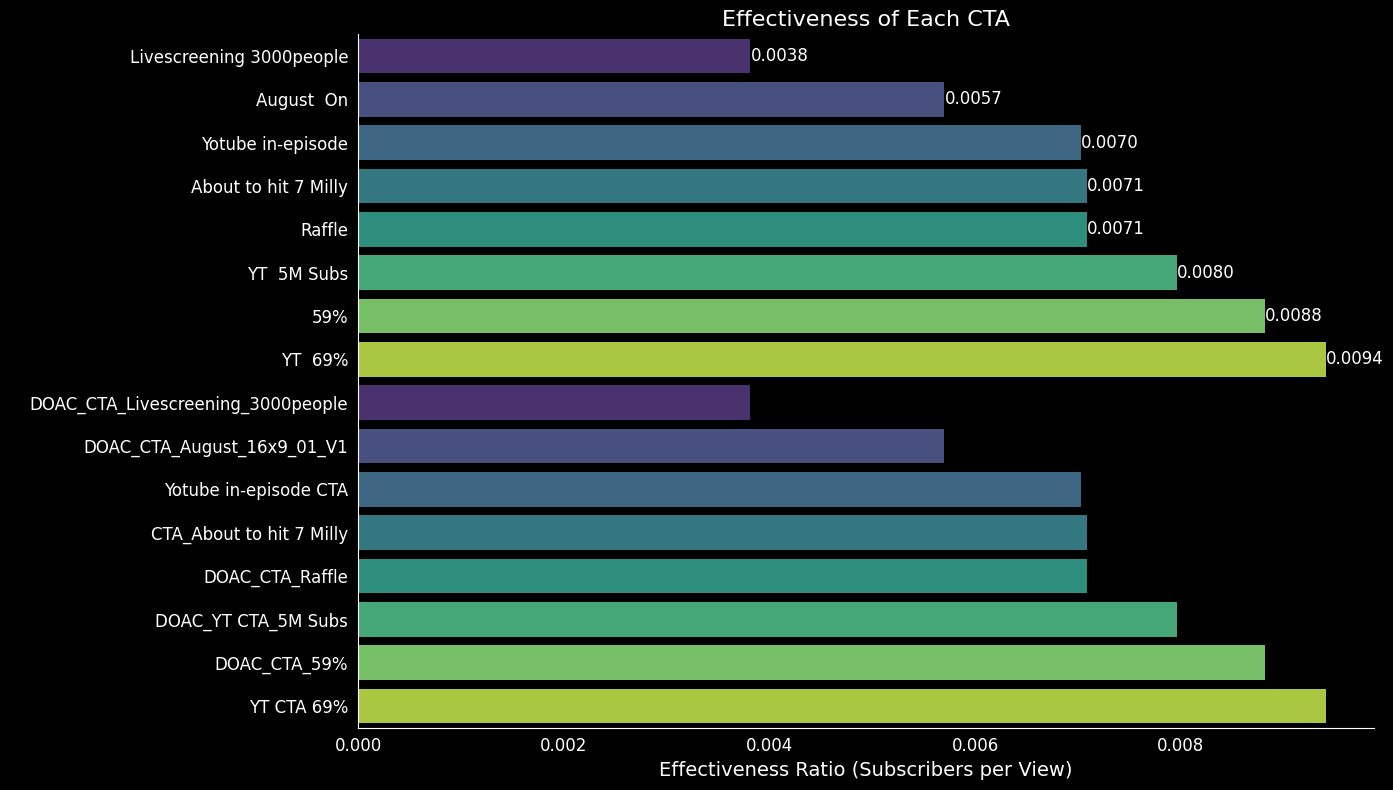

In [11]:
# Calculate the effectiveness ratio (subscriber_count / view_count)
df['effectiveness_ratio'] = df['subscribersGained'] / df['views']

# Group by cta_video_id and calculate the mean effectiveness ratio
cta_effectiveness = df.groupby('cta_video_id')['effectiveness_ratio'].mean().sort_values()

print(cta_effectiveness)
# Clean up the x-axis labels
clean_labels = cta_effectiveness.index.str.replace('_', ' ').str.replace('DOAC', '').str.replace('CTA', '').str.replace('16x9 01 V1',' On').str.strip()

# Verify that the order of clean_labels matches cta_effectiveness.index
assert len(clean_labels) == len(cta_effectiveness.index), "Label length mismatch"
for original, cleaned in zip(cta_effectiveness.index, clean_labels):
    print(f"Original: {original}, Cleaned: {cleaned}")
# Plot the effectiveness of each CTA Video ID
plt.figure(figsize=(14, 8))
sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')
sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')

plt.title('Effectiveness of Each CTA', fontsize=16, color='white')
plt.xlabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
#plt.ylabel('CTA Video ID', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(False)  # Remove grid lines

# Customize axis lines to be white and only show bottom and left boundaries
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Add ratio labels on the bars
for index, value in enumerate(cta_effectiveness.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_96717/2968417580.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')


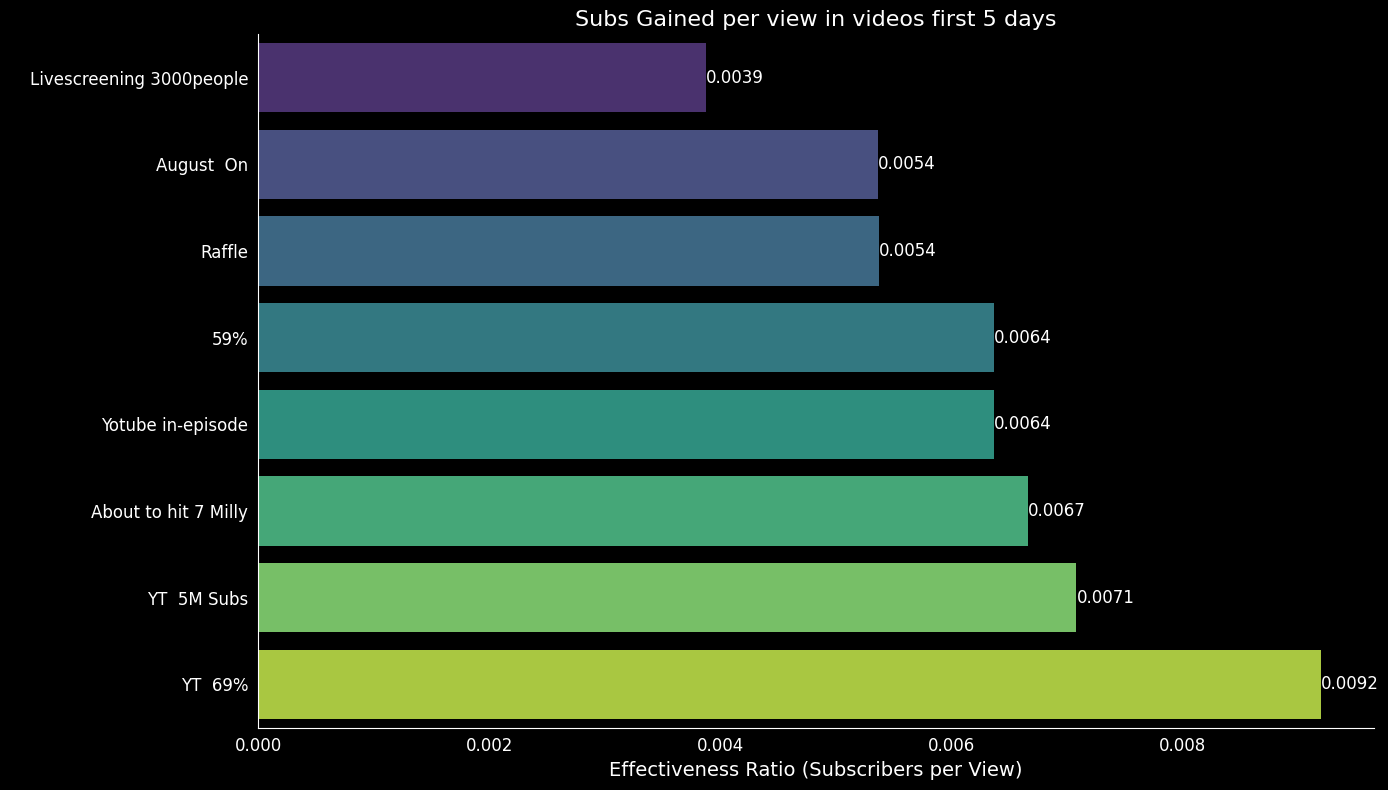

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the effectiveness ratio (subscriber_count / view_count)
df['effectiveness_ratio'] = df['subscribersGained_y'] / df['views_y']

# Group by cta_video_id and calculate the mean effectiveness ratio
cta_effectiveness = df.groupby('cta_video_id')['effectiveness_ratio'].mean().sort_values()

# Clean up the x-axis labels
clean_labels = cta_effectiveness.index.str.replace('_', ' ').str.replace('DOAC', '').str.replace('CTA', '').str.replace('16x9 01 V1',' On').str.strip()

# Plot the effectiveness of each CTA Video ID
plt.figure(figsize=(14, 8))
sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')

plt.title('Subs Gained per view in videos first 5 days', fontsize=16, color='white')
plt.xlabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(False)  # Remove grid lines

# Customize axis lines to be white and only show bottom and left boundaries
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Add ratio labels on the bars
for index, value in enumerate(cta_effectiveness.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/3936890222.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cta_usage_over_time = df.set_index('release_date').groupby('cta_video_id').resample('M').size().unstack(fill_value=0)


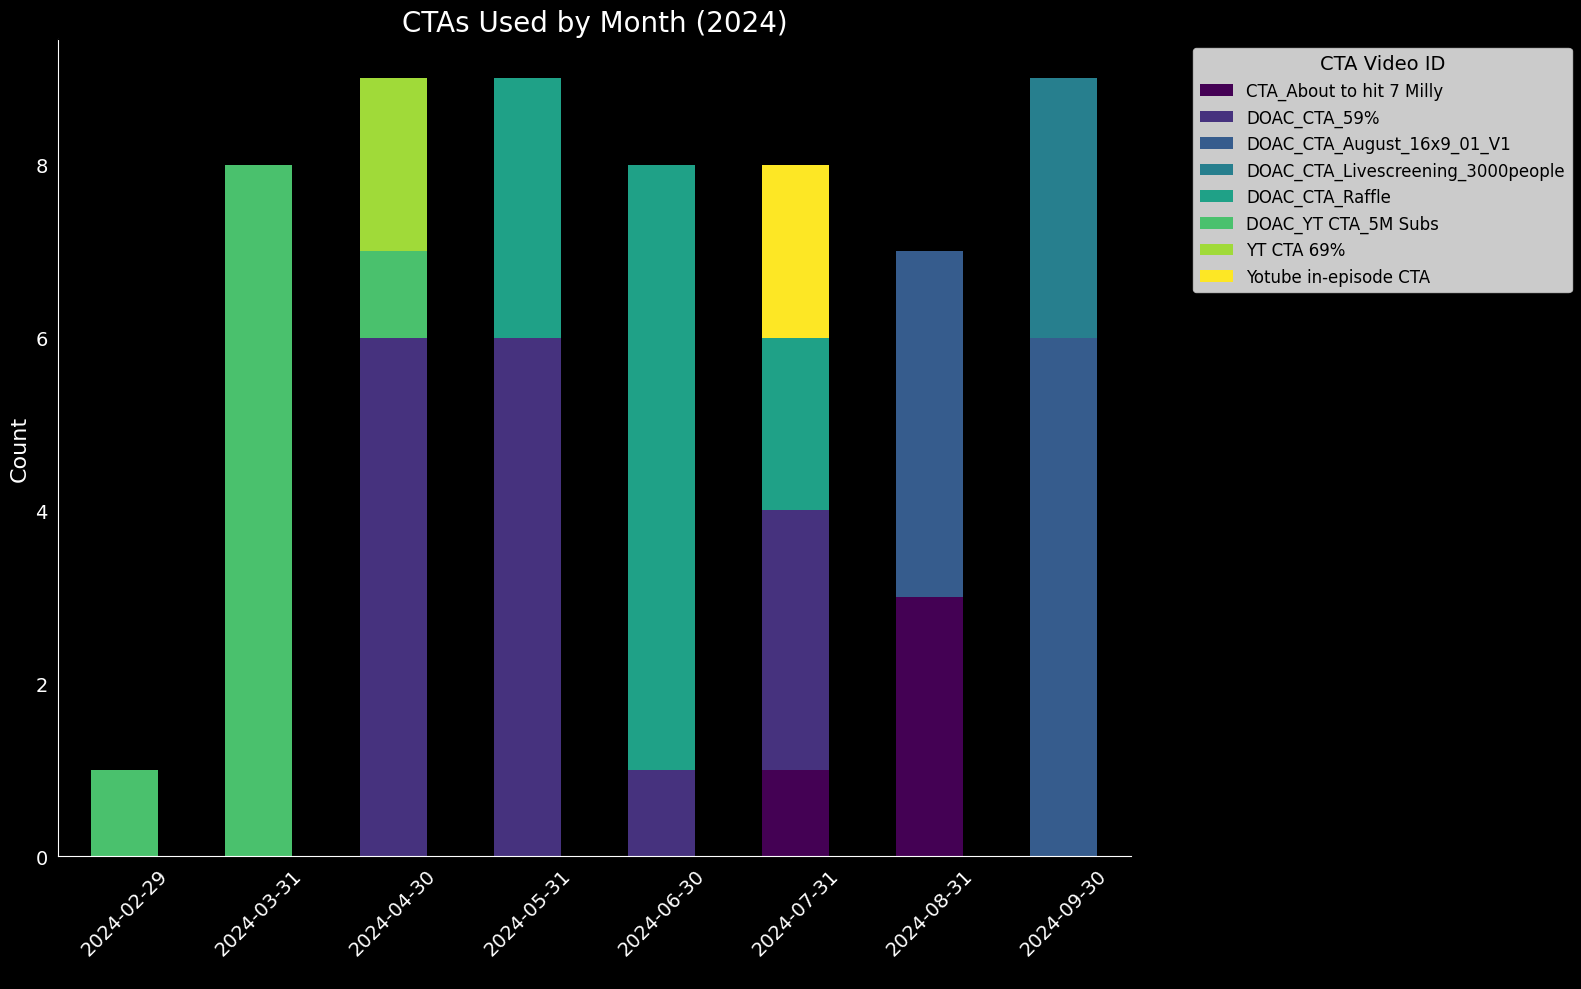

In [14]:
# Ensure release_date is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')


# Resample data to count cta_video_id usage over time (monthly)
cta_usage_over_time = df.set_index('release_date').groupby('cta_video_id').resample('M').size().unstack(fill_value=0)

# Convert column names to strings and clean up the x-axis labels
clean_labels = cta_usage_over_time.columns.astype(str).str.replace('_', ' ').str.replace('DOAC', '').str.replace('CTA', '').str.replace('16x9 01 V1',' On').str.strip()

# Plot the usage of each cta_video_id over time as a stacked bar chart
plt.figure(figsize=(16, 10))
cta_usage_over_time.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

plt.title('CTAs Used by Month (2024)', fontsize=20, color='white')
#plt.xlabel('Month', fontsize=16, color='white')
plt.ylabel('Count', fontsize=16, color='white')
plt.xticks(rotation=45, fontsize=14, color='white')

# Update x-axis to show only the month
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(clean_labels))

plt.yticks(fontsize=14, color='white')

# Remove grid lines
plt.grid(False)

# Customize axis lines to be white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Place the legend outside the plot
plt.legend(title='CTA Video ID', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/741527999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')


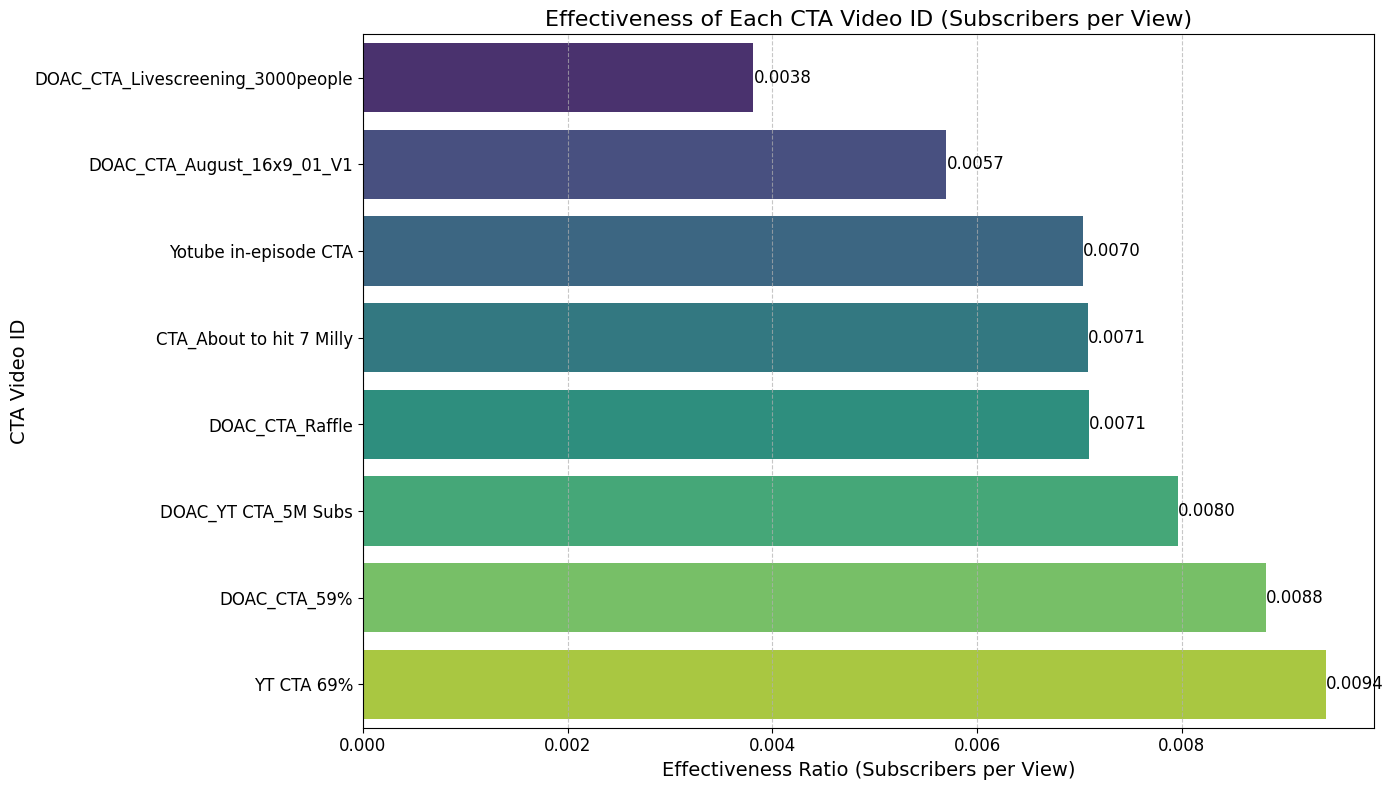

In [15]:
# Plot the effectiveness of each CTA Video ID
plt.figure(figsize=(14, 8))
sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')

plt.title('Effectiveness of Each CTA Video ID (Subscribers per View)', fontsize=16)
plt.xlabel('Effectiveness Ratio (Subscribers per View)', fontsize=14)
plt.ylabel('CTA Video ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add ratio labels on the bars
for index, value in enumerate(cta_effectiveness.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_96717/3845976976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')


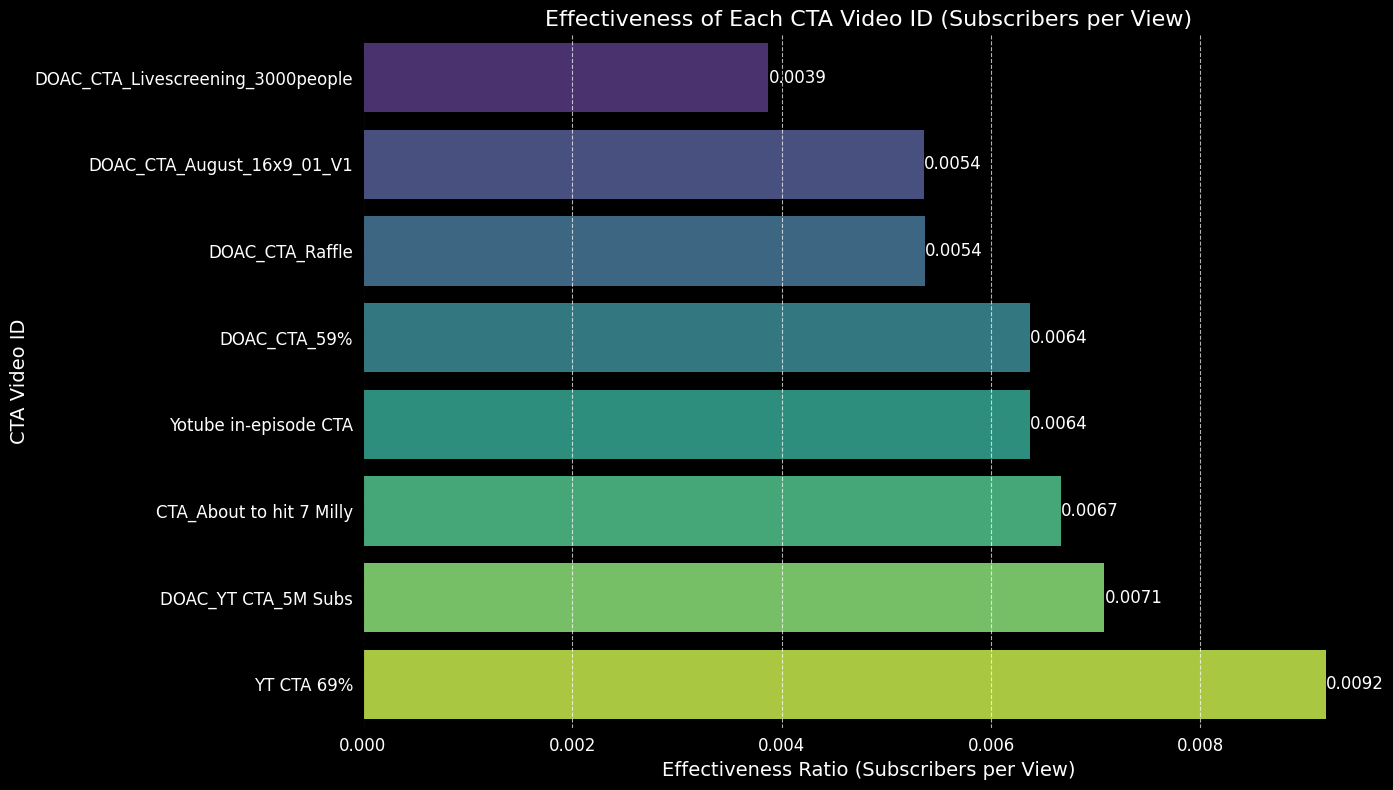

In [9]:
# Plot the effectiveness of each CTA Video ID
plt.figure(figsize=(14, 8))
sns.barplot(x=cta_effectiveness.values, y=cta_effectiveness.index, palette='viridis')

plt.title('Effectiveness of Each CTA Video ID (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.ylabel('CTA Video ID', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='white')

# Add ratio labels on the bars
for index, value in enumerate(cta_effectiveness.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

Original: DOAC_CTA_Livescreening_3000people, Cleaned: Livescreening 3000people
Original: DOAC_CTA_August_16x9_01_V1, Cleaned: August  On
Original: DOAC_CTA_Raffle, Cleaned: Raffle
Original: DOAC_CTA_59%, Cleaned: 59%
Original: Yotube in-episode CTA, Cleaned: Yotube in-episode
Original: CTA_About to hit 7 Milly, Cleaned: About to hit 7 Milly
Original: DOAC_YT CTA_5M Subs, Cleaned: YT  5M Subs
Original: YT CTA 69%, Cleaned: YT  69%


/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_96717/4156816939.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')


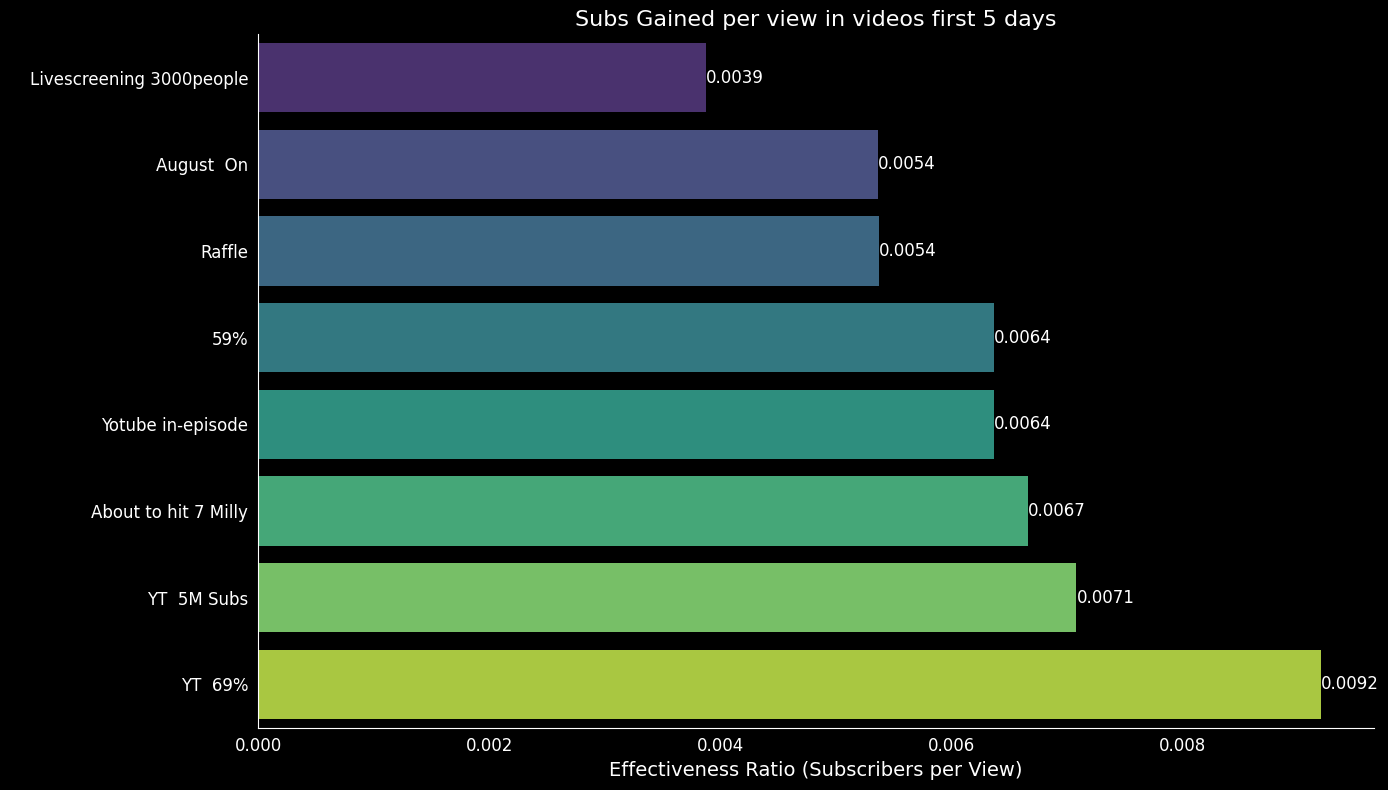

In [10]:
# Clean up the x-axis labels
clean_labels = cta_effectiveness.index.str.replace('_', ' ').str.replace('DOAC', '').str.replace('CTA', '').str.replace('16x9 01 V1',' On').str.strip()

# Verify that the order of clean_labels matches cta_effectiveness.index
assert len(clean_labels) == len(cta_effectiveness.index), "Label length mismatch"
for original, cleaned in zip(cta_effectiveness.index, clean_labels):
    print(f"Original: {original}, Cleaned: {cleaned}")

# Plot the effectiveness of each CTA Video ID
plt.figure(figsize=(14, 8))
sns.barplot(x=cta_effectiveness.values, y=clean_labels, palette='viridis')

plt.title('Subs Gained per view in videos first 5 days', fontsize=16, color='white')
plt.xlabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(False)  # Remove grid lines

# Customize axis lines to be white and only show bottom and left boundaries
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Add ratio labels on the bars
for index, value in enumerate(cta_effectiveness.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/1530885044.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  effectiveness_over_time = df.set_index('release_date').resample('M')['effectiveness_ratio'].mean()


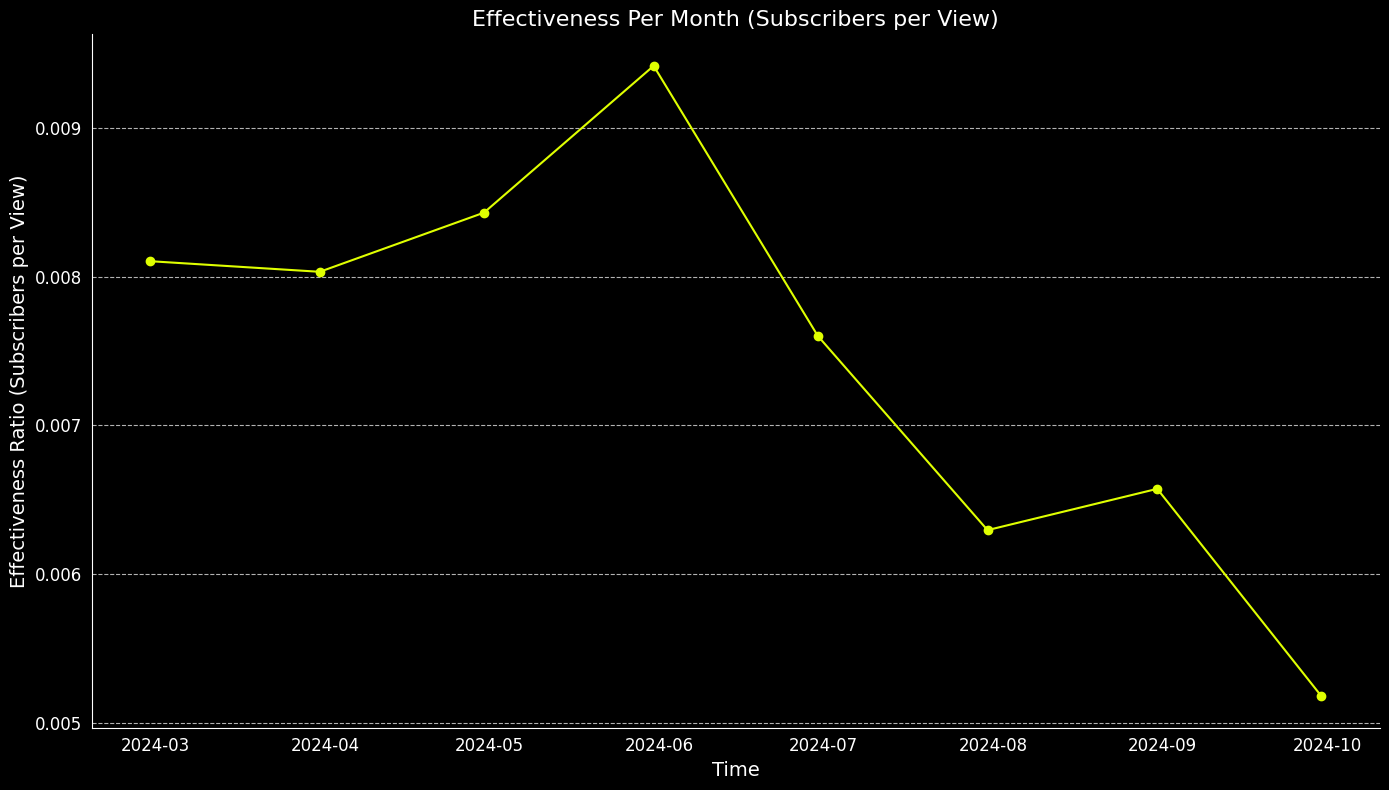

In [24]:
# Resample data to calculate the mean effectiveness ratio over time (monthly)
effectiveness_over_time = df.set_index('release_date').resample('M')['effectiveness_ratio'].mean()

# Plot the effectiveness of CTAs over time
plt.figure(figsize=(14, 8))
plt.plot(effectiveness_over_time.index, effectiveness_over_time.values, marker='o', linestyle='-', color='#DFFF00')

plt.title('Effectiveness Per Month (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Time', fontsize=14, color='white')
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Customize axis lines to be white
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/4258959535.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subscribers_over_time = df.set_index('release_date').resample('M')['subscribersGained'].mean()


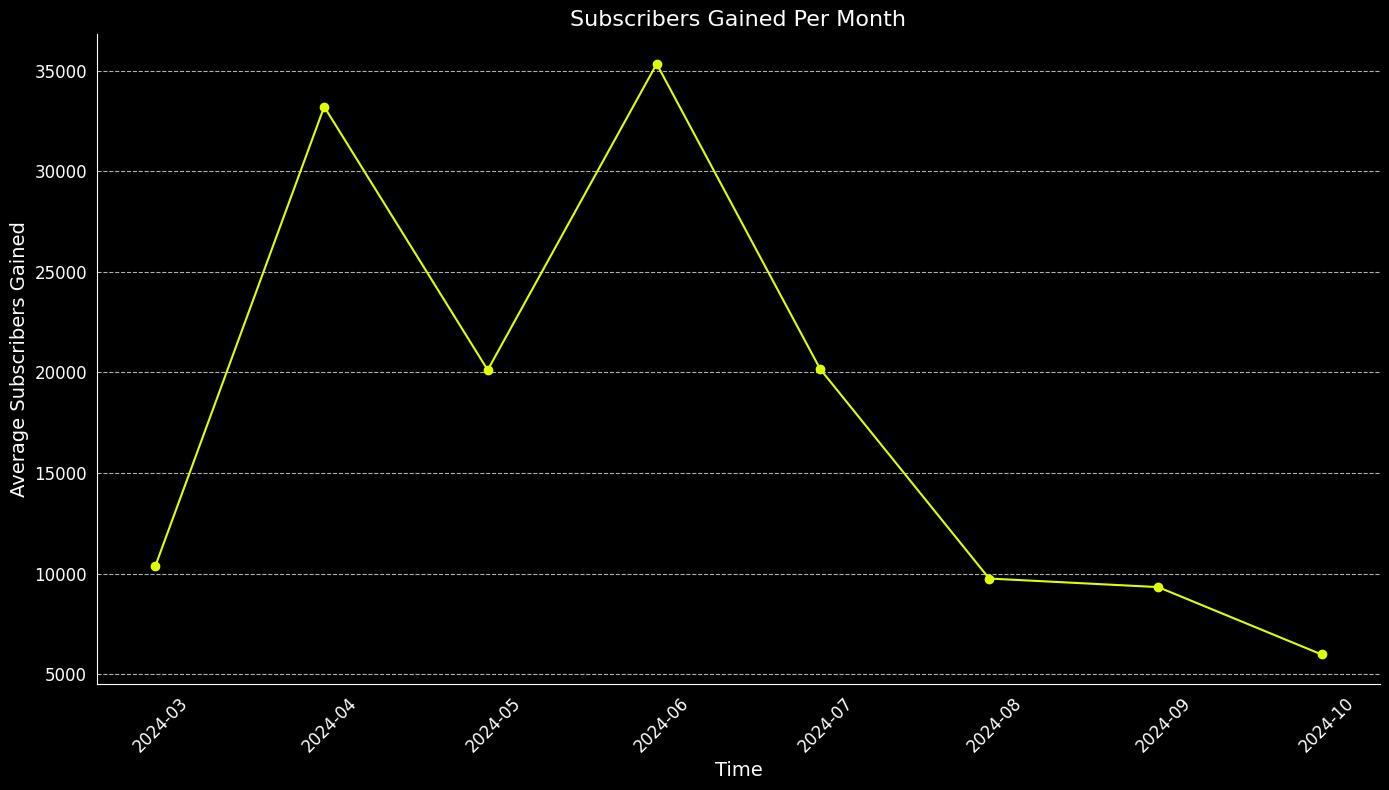

In [22]:
# Resample data to calculate the mean SubscribersGained over time (monthly)
subscribers_over_time = df.set_index('release_date').resample('M')['subscribersGained'].mean()

# Plot the SubscribersGained over time
plt.figure(figsize=(14, 8))
plt.plot(subscribers_over_time.index, subscribers_over_time.values, marker='o', linestyle='-', color='#DFFF00')

plt.title('Subscribers Gained Per Month', fontsize=16, color='white')
plt.xlabel('Time', fontsize=14, color='white')
plt.ylabel('Average Subscribers Gained', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white', rotation=45)
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Customize axis lines to be white
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_32535/3657173908.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.set_index('release_date').resample('M').agg({


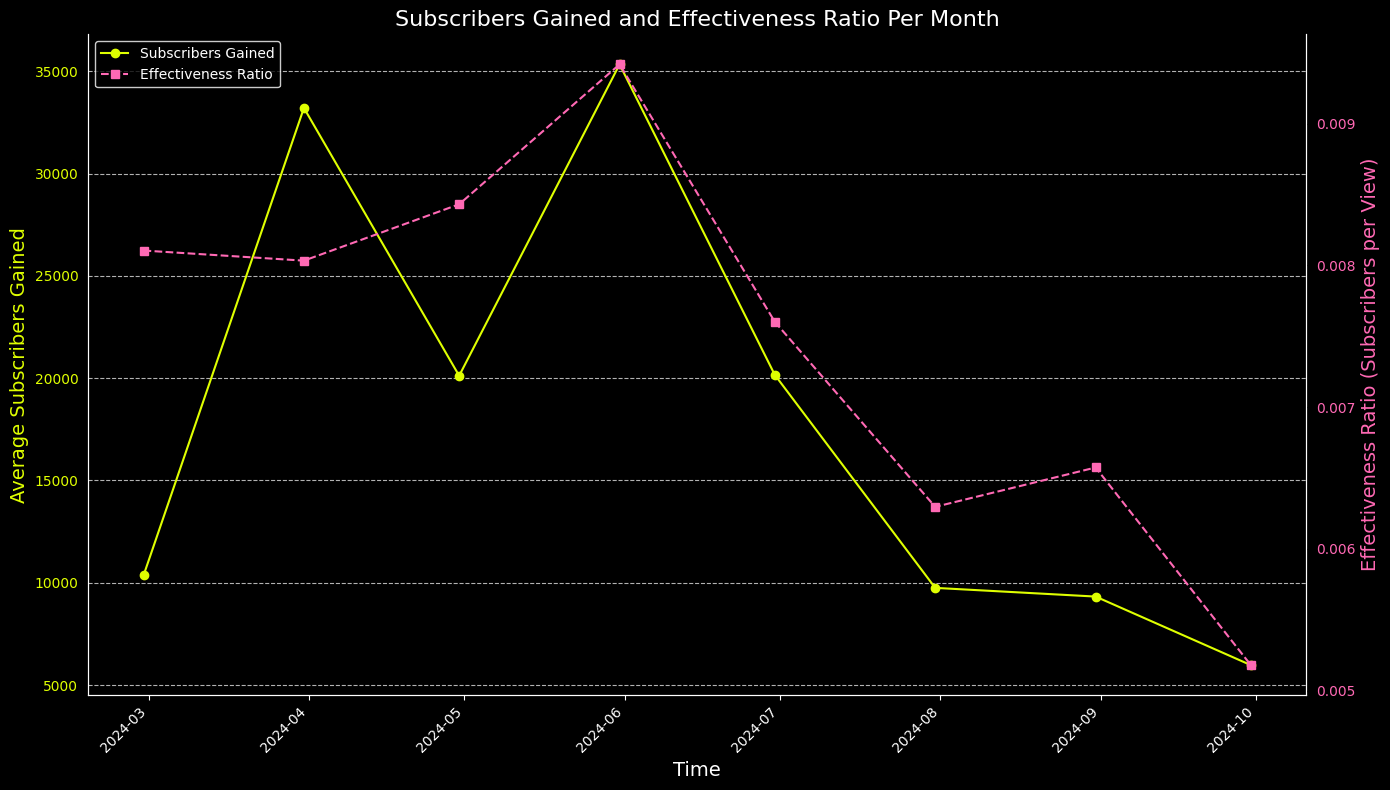

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Resample data to calculate the mean SubscribersGained and effectiveness ratio over time (monthly)
df_resampled = df.set_index('release_date').resample('M').agg({
    'subscribersGained': 'mean',
    'effectiveness_ratio': 'mean'
})

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Subscribers Gained on the primary axis
color1 = '#DFFF00'  # Bright yellow-green
ax1.plot(df_resampled.index, df_resampled['subscribersGained'], marker='o', linestyle='-', color=color1, label='Subscribers Gained')
ax1.set_xlabel('Time', fontsize=14, color='white')
ax1.set_ylabel('Average Subscribers Gained', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a twin axis
ax2 = ax1.twinx()

# Plot Effectiveness Ratio on the secondary axis
color2 = '#FF69B4'  # Light pink
ax2.plot(df_resampled.index, df_resampled['effectiveness_ratio'], marker='s', linestyle='--', color=color2, label='Effectiveness Ratio')
ax2.set_ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set title and customize the plot
plt.title('Subscribers Gained and Effectiveness Ratio Per Month', fontsize=16, color='white')
ax1.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Customize axis lines and ticks
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Set the background color to black
ax1.set_facecolor('black')
fig.patch.set_facecolor('black')

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Group by cta_video_id and calculate the sum of views, sum of subscribers, and mean effectiveness ratio
cta_summary = df.groupby('cta_video_id').agg({
    'views': 'sum',
    'subscribersGained': 'sum',
    'effectiveness_ratio': 'mean'
}).reset_index()

# Rename columns for clarity
cta_summary.columns = ['CTA Video ID', 'Total Views', 'Total Subscribers', 'Effectiveness Ratio']

# Display the summary table
print(cta_summary)

                        CTA Video ID  Total Views  Total Subscribers  \
0           CTA_About to hit 7 Milly    4728995.0            34156.0   
1                       DOAC_CTA_59%   39092733.0           425605.0   
2         DOAC_CTA_August_16x9_01_V1   12968604.0            79505.0   
3  DOAC_CTA_Livescreening_3000people    1015558.0             4015.0   
4                    DOAC_CTA_Raffle   22600561.0           217137.0   
5                DOAC_YT CTA_5M Subs   30126903.0           304303.0   
6                         YT CTA 69%    3149744.0            28345.0   
7              Yotube in-episode CTA    4828041.0            34495.0   

   Effectiveness Ratio  
0             0.007084  
1             0.008821  
2             0.005701  
3             0.003815  
4             0.007090  
5             0.007960  
6             0.009406  
7             0.007030  


In [12]:
df['mentions_raffle'] = df['cta_summary'].str.contains('raffle', case=False, na=False)
df['mentions_raffle'].value_counts()

mentions_raffle
False    30
True     19
Name: count, dtype: int64

In [13]:
df['mentions_promisies'] = df['cta_summary'].str.contains('promise', case=False, na=False)
df['mentions_promisies'].value_counts()


mentions_promisies
False    33
True     16
Name: count, dtype: int64

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/3603843836.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=raffle_effectiveness.index, y=raffle_effectiveness.values, palette='viridis')


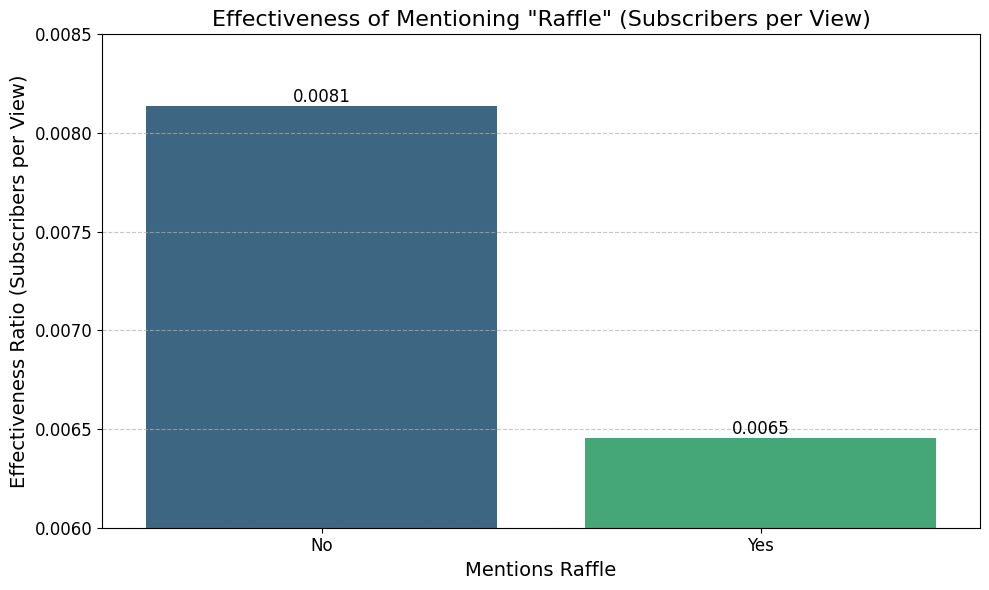

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/3603843836.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promises_effectiveness.index, y=promises_effectiveness.values, palette='viridis')


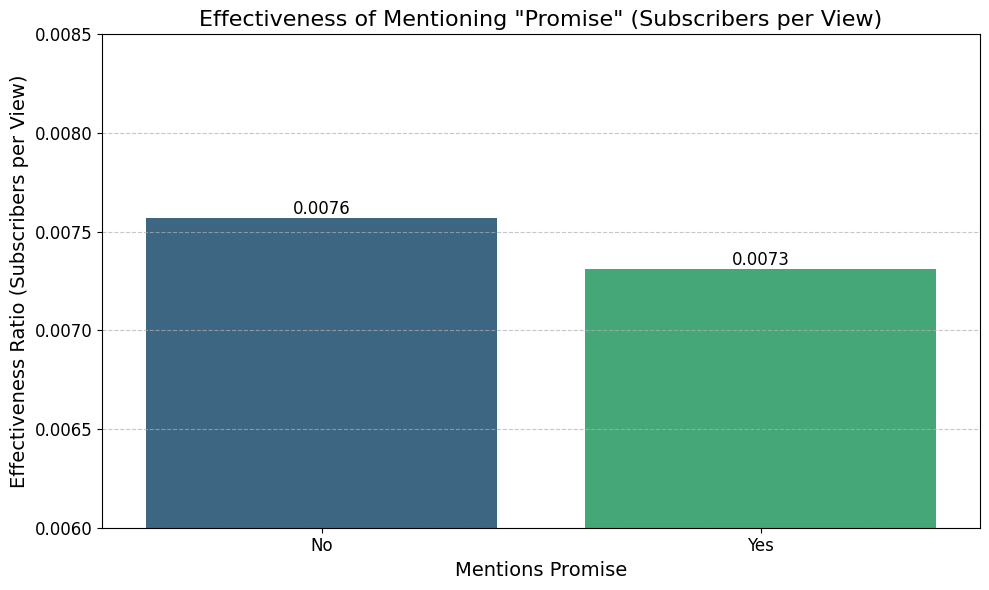

In [14]:

# Calculate the effectiveness ratio (subscriber_count / view_count)
df['effectiveness_ratio'] = df['subscribers'] / df['views']

# Create new columns to indicate whether "raffle" and "promise" are mentioned
df['mentions_raffle'] = df['cta_summary'].str.contains('raffle', case=False, na=False)
df['mentions_promises'] = df['cta_summary'].str.contains('promise', case=False, na=False)

# Group by the new columns and calculate the mean effectiveness ratio
raffle_effectiveness = df.groupby('mentions_raffle')['effectiveness_ratio'].mean()
promises_effectiveness = df.groupby('mentions_promises')['effectiveness_ratio'].mean()

# Plot the effectiveness of mentioning "raffle"
plt.figure(figsize=(10, 6))
sns.barplot(x=raffle_effectiveness.index, y=raffle_effectiveness.values, palette='viridis')

plt.title('Effectiveness of Mentioning "Raffle" (Subscribers per View)', fontsize=16)
plt.xlabel('Mentions Raffle', fontsize=14)
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels on the bars
for index, value in enumerate(raffle_effectiveness.values):
    plt.text(index, value, f'{value:.4f}', va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Plot the effectiveness of mentioning "promise"
plt.figure(figsize=(10, 6))
sns.barplot(x=promises_effectiveness.index, y=promises_effectiveness.values, palette='viridis')

plt.title('Effectiveness of Mentioning "Promise" (Subscribers per View)', fontsize=16)
plt.xlabel('Mentions Promise', fontsize=14)
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels on the bars
for index, value in enumerate(promises_effectiveness.values):
    plt.text(index, value, f'{value:.4f}', va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/1880306811.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=raffle_effectiveness.index, y=raffle_effectiveness.values, palette=['#DFFF00'])
/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/1880306811.py:14: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=raffle_effectiveness.index, y=raffle_effectiveness.values, palette=['#DFFF00'])


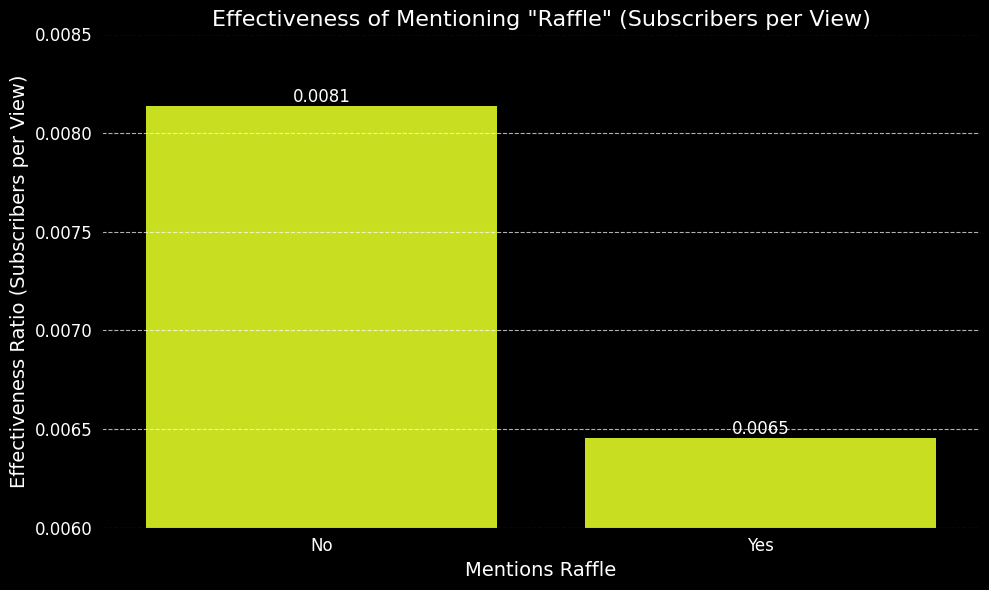

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/1880306811.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promises_effectiveness.index, y=promises_effectiveness.values, palette=['#DFFF00'])
/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/1880306811.py:39: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=promises_effectiveness.index, y=promises_effectiveness.values, palette=['#DFFF00'])


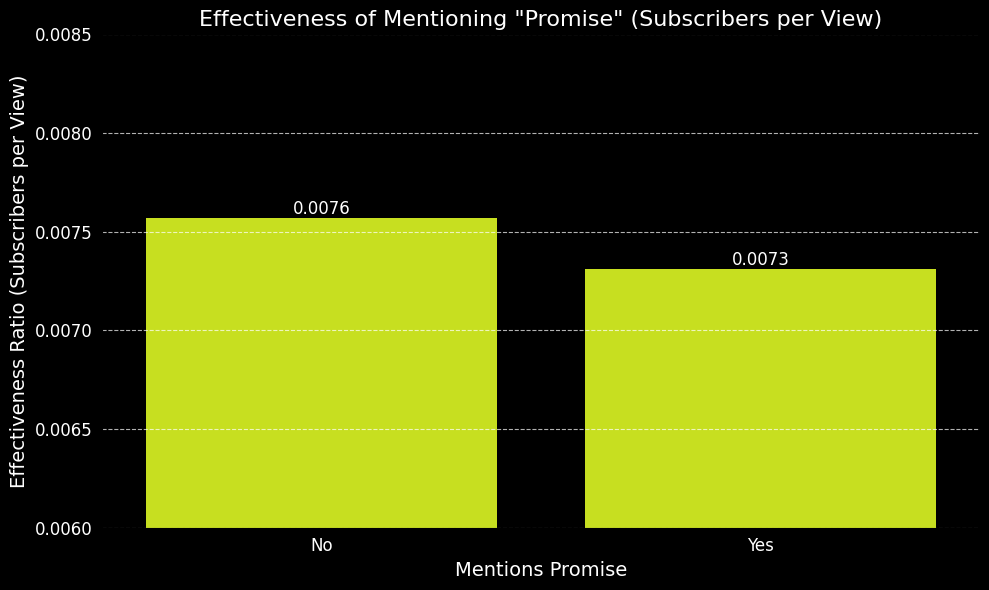

In [15]:
# Calculate the effectiveness ratio (subscriber_count / view_count)
df['effectiveness_ratio'] = df['subscribers'] / df['views']

# Create new columns to indicate whether "raffle" and "promise" are mentioned
df['mentions_raffle'] = df['cta_summary'].str.contains('raffle', case=False, na=False)
df['mentions_promises'] = df['cta_summary'].str.contains('promise', case=False, na=False)

# Group by the new columns and calculate the mean effectiveness ratio
raffle_effectiveness = df.groupby('mentions_raffle')['effectiveness_ratio'].mean()
promises_effectiveness = df.groupby('mentions_promises')['effectiveness_ratio'].mean()

# Plot the effectiveness of mentioning "raffle"
plt.figure(figsize=(10, 6))
sns.barplot(x=raffle_effectiveness.index, y=raffle_effectiveness.values, palette=['#DFFF00'])

plt.title('Effectiveness of Mentioning "Raffle" (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Mentions Raffle', fontsize=14, color='white')
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels on the bars
for index, value in enumerate(raffle_effectiveness.values):
    plt.text(index, value, f'{value:.4f}', va='bottom', ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

# Plot the effectiveness of mentioning "promise"
plt.figure(figsize=(10, 6))
sns.barplot(x=promises_effectiveness.index, y=promises_effectiveness.values, palette=['#DFFF00'])

plt.title('Effectiveness of Mentioning "Promise" (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Mentions Promise', fontsize=14, color='white')
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels on the bars
for index, value in enumerate(promises_effectiveness.values):
    plt.text(index, value, f'{value:.4f}', va='bottom', ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/528196370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mentions_raffle', y='mean', data=raffle_effectiveness, palette=['#DFFF00', '#DFFF00'])


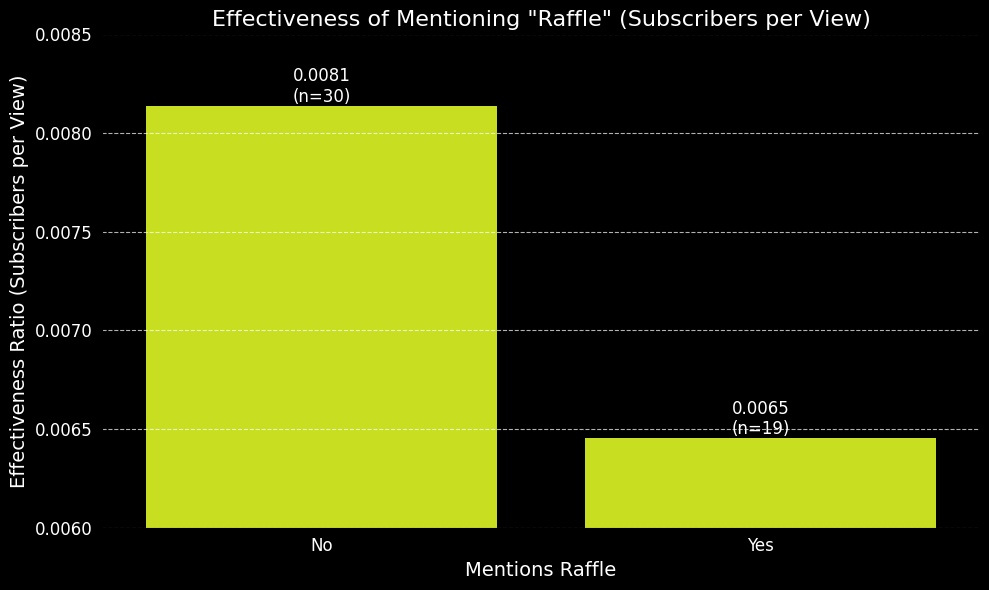

/var/folders/j7/tsl0q1xn0fn5p9_4z1gnzwt80000gq/T/ipykernel_92632/528196370.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mentions_promises', y='mean', data=promises_effectiveness, palette=['#DFFF00', '#DFFF00'])


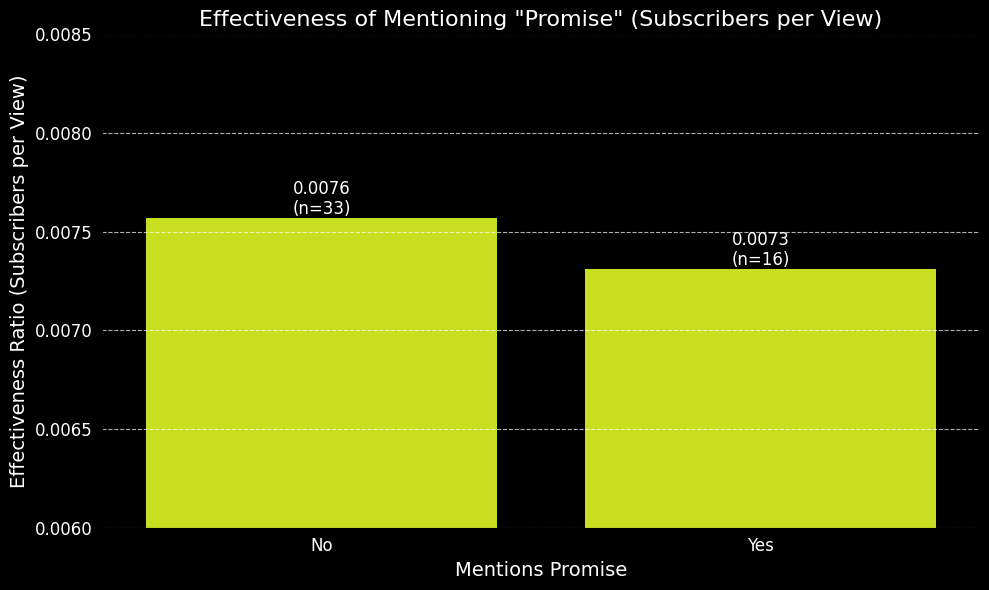

In [18]:
# Group by the new columns and calculate the mean effectiveness ratio and count
raffle_effectiveness = df.groupby('mentions_raffle')['effectiveness_ratio'].agg(['mean', 'count']).reset_index()
promises_effectiveness = df.groupby('mentions_promises')['effectiveness_ratio'].agg(['mean', 'count']).reset_index()

# Plot the effectiveness of mentioning "raffle" with sample size annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='mentions_raffle', y='mean', data=raffle_effectiveness, palette=['#DFFF00', '#DFFF00'])

plt.title('Effectiveness of Mentioning "Raffle" (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Mentions Raffle', fontsize=14, color='white')
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels and sample size on the bars
for index, row in raffle_effectiveness.iterrows():
    plt.text(index, row['mean'], f'{row["mean"]:.4f}\n(n={row["count"]})', va='bottom', ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

# Plot the effectiveness of mentioning "promise" with sample size annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='mentions_promises', y='mean', data=promises_effectiveness, palette=['#DFFF00', '#DFFF00'])

plt.title('Effectiveness of Mentioning "Promise" (Subscribers per View)', fontsize=16, color='white')
plt.xlabel('Mentions Promise', fontsize=14, color='white')
plt.ylabel('Effectiveness Ratio (Subscribers per View)', fontsize=14, color='white')
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Adjust y-axis limits to emphasize the difference
plt.ylim(0.006, 0.0085)

# Add ratio labels and sample size on the bars
for index, row in promises_effectiveness.iterrows():
    plt.text(index, row['mean'], f'{row["mean"]:.4f}\n(n={row["count"]})', va='bottom', ha='center', fontsize=12, color='white')

# Set the background color to black
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tight_layout()
plt.show()

In [15]:
# Calculate the effectiveness ratio (subscriber_count / view_count)
df['effectiveness_ratio'] = df['subscribers'] / df['views']

# Create new columns to indicate whether "raffle" and "promise" are mentioned
df['mentions_raffle'] = df['cta_summary'].str.contains('raffle', case=False, na=False)
df['mentions_promises'] = df['cta_summary'].str.contains('promise', case=False, na=False)

# Display the first few rows to verify
print(df[['cta_summary', 'mentions_raffle', 'mentions_promises', 'effectiveness_ratio']].head())

                                         cta_summary  mentions_raffle  \
0  - Mentions subscriber statistics (74% to 69%)\...            False   
1  - Mentions subscriber statistics (74% to 69%)\...            False   
2  - Mentions podcast team\n- Uses Statistics (63...            False   
3  - Mentions podcast team\n- Uses Statistics (63...            False   
4  - Mentions podcast team\n- Uses Statistics (63...            False   

   mentions_promises  effectiveness_ratio  
0              False             0.010311  
1              False             0.007965  
2              False             0.006750  
3              False             0.009058  
4              False             0.006662  


In [16]:
# Group by the new columns and calculate the mean effectiveness ratio
raffle_effectiveness = df.groupby('mentions_raffle')['effectiveness_ratio'].mean()
promises_effectiveness = df.groupby('mentions_promises')['effectiveness_ratio'].mean()

# Display the results to verify
print("Raffle Effectiveness:")
print(raffle_effectiveness)
print("\nPromises Effectiveness:")
print(promises_effectiveness)

Raffle Effectiveness:
mentions_raffle
False    0.008136
True     0.006453
Name: effectiveness_ratio, dtype: float64

Promises Effectiveness:
mentions_promises
False    0.007567
True     0.007309
Name: effectiveness_ratio, dtype: float64


In [18]:
# Select the relevant columns
unique_combinations = df[['cta_video_id', 'cta_summary', 'mentions_raffle', 'mentions_promises']]

# Drop duplicate rows to ensure unique combinations
unique_combinations = unique_combinations.drop_duplicates()

# Save the unique combinations to a CSV file
unique_combinations.to_csv('unique_combinations.csv', index=False)

print("Unique combinations saved to unique_combinations.csv")

Unique combinations saved to unique_combinations.csv


In [16]:
# Filter the dataframe for the specific cta_video_id
filtered_df = df[df['cta_video_id'] == "YT CTA 69%"]

# Extract the guest_name values
guest_names = filtered_df['guest_name'].unique()

# Display the guest names
print(guest_names)

['Tim Dillon' 'Ronda Rousey']


In [ ]:
df['']

In [18]:
# Group by cta_video_id and extract unique guest_name values for each group
cta_guest_names = df.groupby('cta_video_id')['guest_name'].unique()

# Display the combinations
for cta_id, guests in cta_guest_names.items():
    print(f"CTA Video ID: {cta_id}")
    print("Guest Names:", guests)
    print()

CTA Video ID: CTA_About to hit 7 Milly
Guest Names: ['Andrew Bustamante' 'Francis Ngannou' 'Dr Cheri' 'Marc Randolph']

CTA Video ID: DOAC_CTA_59%
Guest Names: ['Annie Jacobsen' 'Dr Mark' 'Rebel Wilson' 'Robert Lustig' 'Dr Michael'
 'James Sexton' 'Jocko Willink' 'Scott Galloway' 'Johann Hari' 'Russ Cook'
 'Gary Brecka' 'Evy Poumpouras' 'Josh Kaufman' 'Mo Gawdat' 'Jimmy Carr'
 'Dr Tyna']

CTA Video ID: DOAC_CTA_August_16x9_01_V1
Guest Names: ['Michael Franzese' 'Codie Sanchez' 'Dr Bret']

CTA Video ID: DOAC_CTA_Raffle
Guest Names: ['Dr Mindy' 'Dr Wendy' 'Dr Lisa' 'Doctor Mike' 'Charlamagne tha God'
 'Richard Reeves' 'Dr Natalie' 'Simon Sinek' 'Louise Perry' 'Wim Hof'
 'Professor Guy' 'Simon Cowell']

CTA Video ID: DOAC_YT CTA_5M Subs
Guest Names: ['Andrew Bustamante' 'Dr Alok' 'Dr Rena' 'George Heaton' 'Paul Conti'
 'Lori Gottlieb' 'Dr Ramani' 'Robert Greene' 'Julie Gottman'
 'Layne Norton']

CTA Video ID: YT CTA 69%
Guest Names: ['Tim Dillon' 'Ronda Rousey']

CTA Video ID: Yotube in-e

In [19]:
# Group by cta_video_id and sum the view_count for each group
cta_view_sums = df.groupby('cta_video_id')['view_count'].sum()

# Display the sum of total views per CTA
print(cta_view_sums)

cta_video_id
CTA_About to hit 7 Milly       4130030.0
DOAC_CTA_59%                  31330459.0
DOAC_CTA_August_16x9_01_V1     2979601.0
DOAC_CTA_Raffle               20310477.0
DOAC_YT CTA_5M Subs           29580726.0
YT CTA 69%                     3106978.0
Yotube in-episode CTA          4466656.0
Name: view_count, dtype: float64


In [20]:
# Group by cta_video_id and calculate the mean view_count for each group
cta_view_avg = df.groupby('cta_video_id')['view_count'].mean()

# Display the average views per CTA
print(cta_view_avg)

cta_video_id
CTA_About to hit 7 Milly      1.032508e+06
DOAC_CTA_59%                  2.237890e+06
DOAC_CTA_August_16x9_01_V1    9.932003e+05
DOAC_CTA_Raffle               1.846407e+06
DOAC_YT CTA_5M Subs           2.958073e+06
YT CTA 69%                    1.553489e+06
Yotube in-episode CTA         2.233328e+06
Name: view_count, dtype: float64


In [ ]:
filtered_df = df[df['cta_video_id'] == "YT CTA 69%"]


In [21]:
# Filter the dataframe for rows where mentions_raffle is True
raffle_ctas = df[df['mentions_raffle'] == True]['cta_video_id'].unique()

# Display the CTAs that mention raffle
print("CTAs that mention 'raffle':")
print(raffle_ctas)

CTAs that mention 'raffle':
['DOAC_CTA_Raffle' 'CTA_About to hit 7 Milly' 'DOAC_CTA_August_16x9_01_V1']


In [28]:
# Filter the dataframe for rows where mentions_raffle is True
raffle_ctas = df[df['mentions_raffle'] == True]['cta_video_id'].unique()

# Calculate the count of CTAs that mention raffle
raffle_cta_count = df[df['mentions_raffle'] == True].shape[0]

# Calculate the count of CTAs that do not mention raffle
non_raffle_cta_count = df[df['mentions_raffle'] == False].shape[0]

# Display the results
print("CTAs that mention 'raffle':")
print(raffle_ctas)
print(f"Number of times CTAs that mention 'raffle' were used: {raffle_cta_count}")
print(f"Number of times CTAs that do not mention 'raffle' were used: {non_raffle_cta_count}")

CTAs that mention 'raffle':
['DOAC_CTA_Raffle' 'CTA_About to hit 7 Milly' 'DOAC_CTA_August_16x9_01_V1']
Number of times CTAs that mention 'raffle' were used: 19
Number of times CTAs that do not mention 'raffle' were used: 30


In [22]:
df[df['guest_name']=='Dr Wendy']

,episode_id,guest_name,episode_name,release_date,transcript_length,transcribed_time,episode_description,podcast_transcript,cta_video_id,cta_transcript,...,edit_dist,average_view_duration,impressions,view_count,subscriber_count,impressions_click_through_rate,effectiveness_ratio,mentions_raffle,mentions_promisies,mentions_promises
19,5o-tRub-0pQ,Dr Wendy,"The Exercise Neuroscientist: NEW RESEARCH, The...",2024-05-23,78771,28/08/2024 10:47:55,Dr Wendy Suzuki is a Professor of Neural Scien...,trailer: In this box is a real preserved human...,DOAC_CTA_Raffle,We've just hit 6 million subscribers on the di...,...,143,0:13:16,85195041.0,6224797.0,101500.0,4.04,0.016306,True,False,False


In [24]:
# Filter the dataframe for rows where guest_name is 'Dr Wendy'
dr_wendy_df = df[df['guest_name'] == 'Dr Wendy']

# Calculate the total subscribers gained for 'Dr Wendy'
dr_wendy_subscribers = dr_wendy_df['subscriber_count'].sum()

# Calculate the total subscribers gained for other guests
other_guests_df = df[df['guest_name'] != 'Dr Wendy']
other_guests_subscribers = other_guests_df['subscriber_count'].sum()

# Display the results
print(f"Total subscribers gained for 'Dr Wendy': {dr_wendy_subscribers}")
print(f"Total subscribers gained for other guests: {other_guests_subscribers}")

# Optionally, calculate the average subscribers gained per episode
dr_wendy_avg_subscribers = dr_wendy_df['subscriber_count'].mean()
other_guests_avg_subscribers = other_guests_df['subscriber_count'].mean()

print(f"Average subscribers gained per episode for 'Dr Wendy': {dr_wendy_avg_subscribers}")
print(f"Average subscribers gained per episode for other guests: {other_guests_avg_subscribers}")

Total subscribers gained for 'Dr Wendy': 101500.0
Total subscribers gained for other guests: 817667.0
Average subscribers gained per episode for 'Dr Wendy': 101500.0
Average subscribers gained per episode for other guests: 18170.37777777778


Testing and Optimization: To improve confidence in the CTA's effectiveness, we might consider A/B testing—where one version of a video includes a CTA and another does not—or varying the placement and style of the CTA to see how it impacts subscriber growth.



In [27]:

# Calculate the effectiveness ratio for each row
df['effectiveness_ratio'] = df['subscribers'] / df['views']

# Group by cta_video_id and calculate the mean effectiveness ratio
cta_effectiveness = df.groupby('cta_video_id')['effectiveness_ratio'].mean().reset_index()

# Rename the effectiveness_ratio column for clarity
cta_effectiveness = cta_effectiveness.rename(columns={'effectiveness_ratio': 'mean_subs_per_view'})

# Order by the new column in descending order
cta_effectiveness = cta_effectiveness.sort_values(by='mean_subs_per_view', ascending=False)

# Save the result to a CSV file
cta_effectiveness.to_csv('cta_effectiveness.csv', index=False)

# Display the table
print(cta_effectiveness)

                 cta_video_id  mean_subs_per_view
5                  YT CTA 69%            0.009138
1                DOAC_CTA_59%            0.008495
4         DOAC_YT CTA_5M Subs            0.007647
0    CTA_About to hit 7 Milly            0.006769
3             DOAC_CTA_Raffle            0.006726
6       Yotube in-episode CTA            0.006703
2  DOAC_CTA_August_16x9_01_V1            0.004936


In [26]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('video_analytics_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Basic analysis
print("Summary statistics:")
print(df.describe())

print("Column names:")
print(df.columns)

          guest_name   episode_id  \
0    Dr Alok Kanojia  P1ALkQMfkjc   
1  Dr Gabrielle Lyon  2j3T4oYJPfI   
2   Konstantin Kisin  GbV6iW26h-Q   
3    Jessie Inchausp  3esF-pNAM9c   
4       The Gottmans  H9kPmiV0B34   

                                        episode_name release_date  \
0  Dr K: We Are Producing Millions Of Lonely, Add...   2024-09-30   
1  The Anti-Obesity Doctor: If You Don't Exercise...   2024-09-26   
2  The Anti-Woke Expert: “We Are Witnessing The F...   2024-09-23   
3  Glucose Goddess: The Alarming New Truth About ...   2024-09-19   
4  The Gottman Doctors: Affairs Can Save Your Rel...   2024-09-16   

   transcript_length         transcribed_time  \
0             166981  2024-10-01 16:59:35 UTC   
1              99106  2024-10-01 17:01:59 UTC   
2             123337  2024-10-01 17:04:37 UTC   
3             107251  2024-10-01 17:08:18 UTC   
4             110972  2024-10-01 17:11:29 UTC   

                        cta_video_id  \
0  DOAC_CTA_Livescreening_3